**1. Import the dataset using Pandas**

In [1]:
import pandas as pd

# Dataset URL
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"

# Importing dataset
df = pd.read_csv(url)


**2. High Level Data Understanding**

a. Find no. of rows & columns in the dataset
python
Copy code


In [2]:
# Number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 57394
Number of columns: 49


b. Data types of columns

In [3]:
# Data types of columns
print("Data types of columns:")
print(df.dtypes)


Data types of columns:
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_

c. Info & describe of data in dataframe

In [4]:
# Info and describe
print("Info:")
print(df.info())

print("\nDescribe:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million              

**3. Low Level Data Understanding**

a. Find count of unique values in location column

In [5]:
# Count of unique values in location column
unique_locations = df['location'].nunique()
print(f"Count of unique values in location column: {unique_locations}")


Count of unique values in location column: 216


b. Find which continent has maximum frequency using value counts
python
Copy code


In [6]:
# Continent with maximum frequency
continent_max_freq = df['continent'].value_counts().idxmax()
print(f"Continent with maximum frequency: {continent_max_freq}")


Continent with maximum frequency: Europe


c. Find maximum & mean value in 'total_cases'

In [7]:
# Maximum and mean value in 'total_cases'
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print(f"Maximum total_cases: {max_total_cases}")
print(f"Mean total_cases: {mean_total_cases}")


Maximum total_cases: 55154651.0
Mean total_cases: 167797.3688753302


d. Find 25%, 50%, & 75% quartile value in 'total_deaths'

In [8]:
# Quartile values in 'total_deaths'
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print("Quartile values for total_deaths:")
print(quartiles_total_deaths)


Quartile values for total_deaths:
0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


e. Find which continent has maximum 'human_development_index'

In [9]:
# Continent with maximum 'human_development_index'
continent_max_hdi = df.loc[df['human_development_index'].idxmax(), 'continent']
print(f"Continent with maximum human_development_index: {continent_max_hdi}")


Continent with maximum human_development_index: Europe


f. Find which continent has minimum 'gdp_per_capita'

In [10]:
# Continent with minimum 'gdp_per_capita'
continent_min_gdp = df.loc[df['gdp_per_capita'].idxmin(), 'continent']
print(f"Continent with minimum gdp_per_capita: {continent_min_gdp}")


Continent with minimum gdp_per_capita: Africa


**4. Filter the dataframe**

In [11]:
# Filtered dataframe with selected columns
selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df_filtered = df[selected_columns].copy()


**5. Data Cleaning**

a. Remove duplicates

In [12]:
# Remove duplicates
df_filtered.drop_duplicates(inplace=True)


b. Find missing values

In [13]:
# Missing values in all columns
missing_values = df_filtered.isnull().sum()
print("Missing values:")
print(missing_values)


Missing values:
continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


c. Remove observations where continent is missing

In [14]:
# Remove observations where continent is missing
df_filtered.dropna(subset=['continent'], inplace=True)


d. Fill missing values with 0


In [15]:
# Fill missing values with 0
df_filtered.fillna(0, inplace=True)


**6. Date time format**

a. Convert date column to datetime format

In [17]:
# Convert date column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

b. Create new column 'month'

In [18]:
# Create new column 'month'
df_filtered['month'] = df_filtered['date'].dt.month


**7. Data Aggregation**

a. Find max value in all columns using groupby on 'continent'

In [19]:
# Group by 'continent' and find max values
df_groupby = df_filtered.groupby('continent').max().reset_index()
print("Max values in all columns by continent:")
print(df_groupby)


Max values in all columns by continent:
       continent                      location       date  total_cases  \
0         Africa                      Zimbabwe 2020-12-11     752269.0   
1           Asia                         Yemen 2020-12-11    8874290.0   
2         Europe                       Vatican 2020-12-11    1991233.0   
3  North America  United States Virgin Islands 2020-12-11   11205486.0   
4        Oceania             Wallis and Futuna 2020-12-11      27750.0   
5  South America                     Venezuela 2020-12-11    5876464.0   

   total_deaths  gdp_per_capita  human_development_index  month  
0       20314.0       26382.287                    0.797     12  
1      130519.0      116935.600                    0.933     12  
2       52147.0       94277.965                    0.953     12  
3      247220.0       54225.446                    0.926     12  
4         907.0       44648.710                    0.939     12  
5      166014.0       22767.037              

**8. Feature Engineering**

a. Create new feature 'total_deaths_to_total_cases'

In [20]:
# Create new feature 'total_deaths_to_total_cases'
df_filtered['total_deaths_to_total_cases'] = df_filtered['total_deaths'] / df_filtered['total_cases']


**9. Data Visualization**

a. Univariate analysis on 'gdp_per_capita'

<ipython-input-21-e885699de444>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered['gdp_per_capita'], kde=False, bins=20)


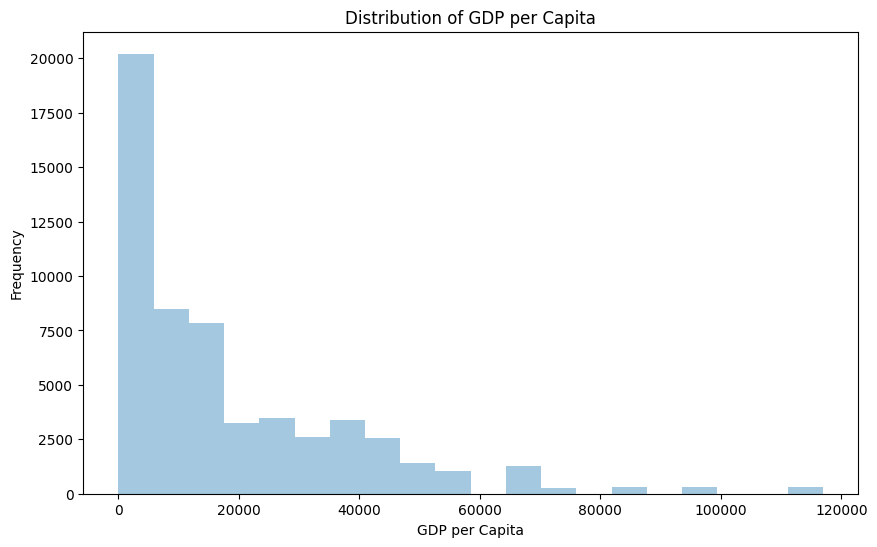

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram using seaborn distplot
plt.figure(figsize=(10, 6))
sns.distplot(df_filtered['gdp_per_capita'], kde=False, bins=20)
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()


b. Scatter plot of 'total_cases' & 'gdp_per_capita'


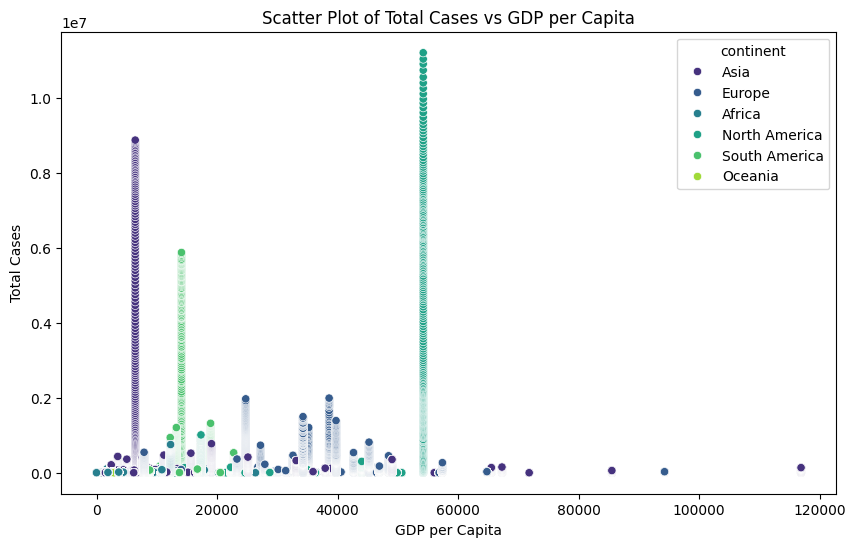

In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='gdp_per_capita', y='total_cases', hue='continent', palette='viridis')
plt.title('Scatter Plot of Total Cases vs GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Total Cases')
plt.show()


c. Pairplot on df_groupby dataset

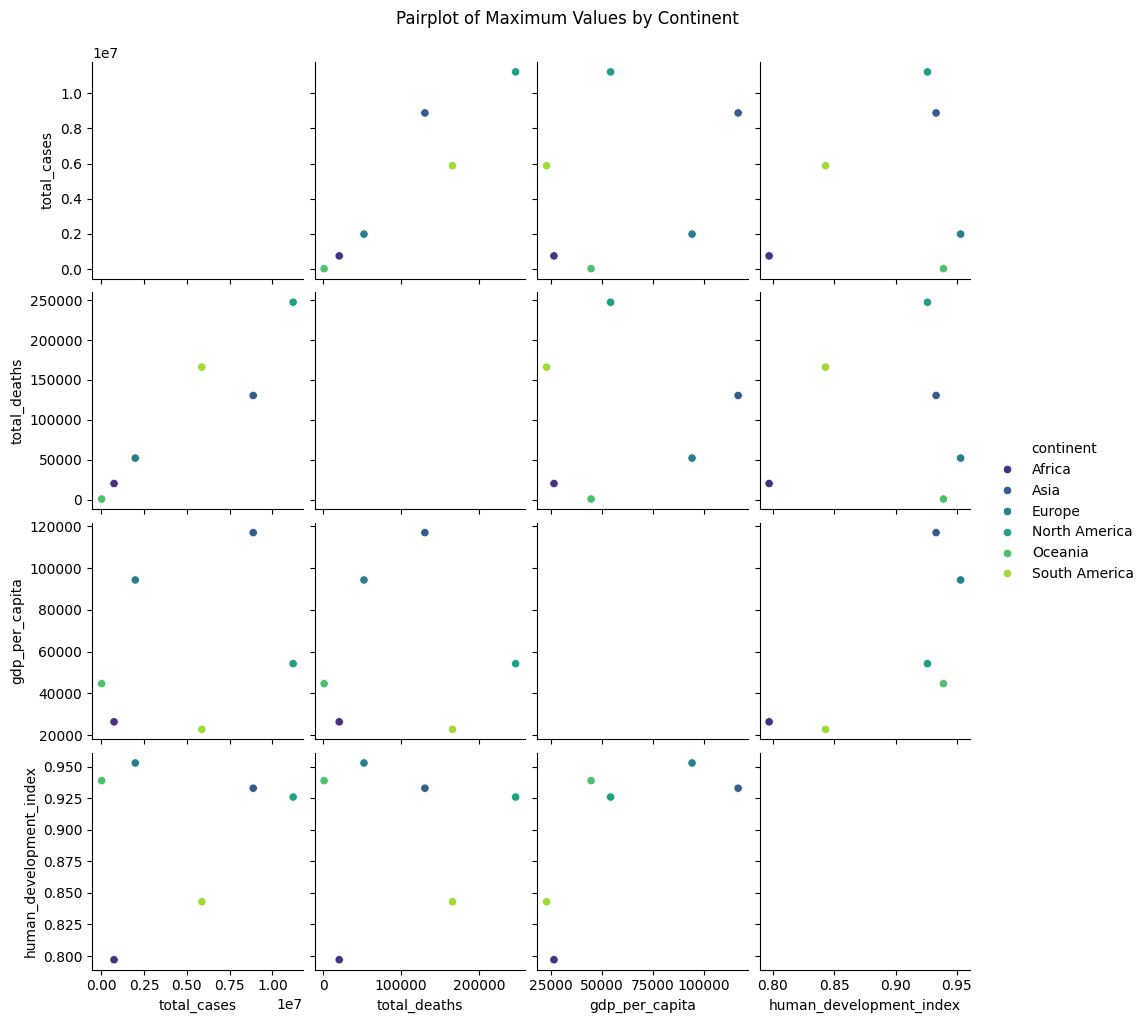

In [23]:
# Pairplot
sns.pairplot(df_groupby.drop(columns=['month']), hue='continent', palette='viridis')
plt.suptitle('Pairplot of Maximum Values by Continent', y=1.02)
plt.show()


d. Bar plot of 'continent' column with 'total_cases'

<ipython-input-24-0e675b61af43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar', palette='viridis')


<Figure size 1000x600 with 0 Axes>

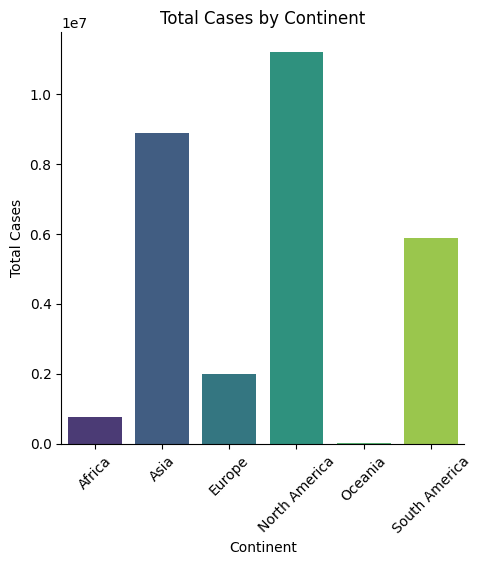

In [24]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.catplot(data=df_groupby, x='continent', y='total_cases', kind='bar', palette='viridis')
plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()


**10. Save df_groupby dataframe to local drive**

In [28]:
# Save df_groupby dataframe to CSV
df_groupby.to_csv('df_groupby_covid_data.csv', index=False)
print("df_groupby dataframe saved successfully.")


df_groupby dataframe saved successfully.
